In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('train_ctrUa4K.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Duplicate Removal**

In [ ]:
duplicated_rows = data.duplicated()

In [ ]:
duplicated_rows.sum()

np.int64(0)

In [ ]:
data = data[~duplicated_rows]

In [ ]:
data.shape

(614, 13)

**Handling Missing Values**

In [ ]:
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for cols in cat_cols:
    data[cols] = data[cols].fillna(data[cols].mode()[0])

In [ ]:
num_cols =['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

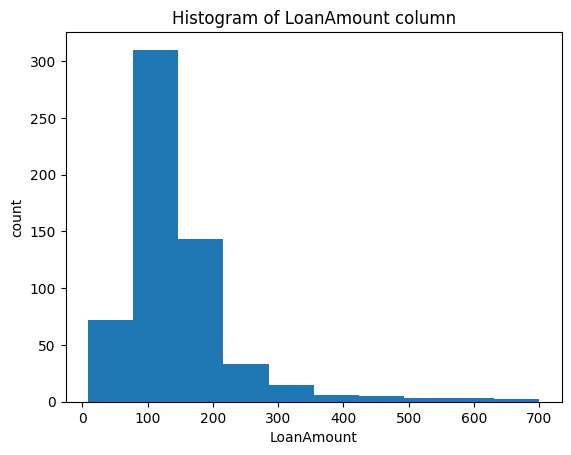

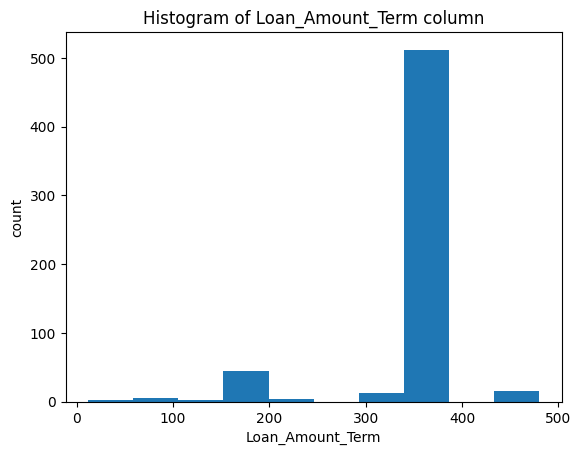

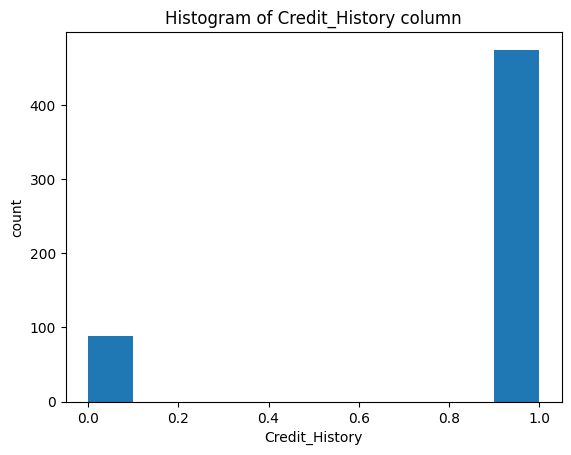

In [ ]:
for col in num_cols:
    plt.hist(data[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [ ]:

for cols in num_cols:
    data[cols] = data[cols].fillna(data[cols].median())

In [ ]:
data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
num_df_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

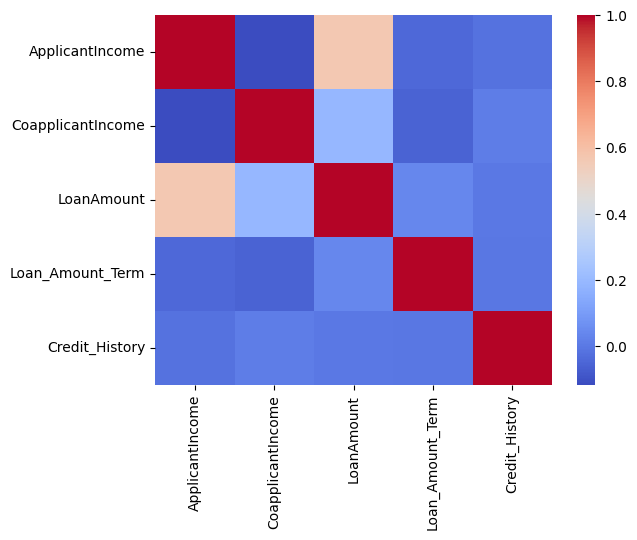

In [ ]:
sns.heatmap(data[num_df_cols].corr(), annot=False, cmap='coolwarm')
plt.show()

**Scaling Numerical Variables**

In [ ]:
scale_num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in scale_num_cols:
  data[col] = (data[col]-data[col].min())/(data[col].max()-data[col].min())

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,0.743590,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,0.743590,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,0.743590,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,0.743590,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,0.743590,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.000000,0.089725,0.743590,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.000000,0.044863,0.358974,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,0.097984,0.005760,0.353111,0.743590,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.000000,0.257598,0.743590,1.0,Urban,Y


**Encoding Categorical Variables**

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,0.74359,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,0.74359,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,0.74359,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,0.74359,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,0.74359,1.0,Urban,Y


In [ ]:
data['Dependents'] = data['Dependents'].replace({'3+':4})

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,0.743590,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,0.743590,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,0.743590,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,0.743590,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,0.743590,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.000000,0.089725,0.743590,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,0.048930,0.000000,0.044863,0.358974,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,0.097984,0.005760,0.353111,0.743590,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.000000,0.257598,0.743590,1.0,Urban,Y


In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No':0})

In [ ]:
data['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [ ]:
data['Property_Area'] = data['Property_Area'].map({'Semiurban': 1, 'Urban': 2, 'Rural': 3})

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,0.070489,0.000000,0.172214,0.743590,1.0,2,Y
1,LP001003,0,1,1,1,0,0.054830,0.036192,0.172214,0.743590,1.0,3,N
2,LP001005,0,1,0,1,1,0.035250,0.000000,0.082489,0.743590,1.0,2,Y
3,LP001006,0,1,0,0,0,0.030093,0.056592,0.160637,0.743590,1.0,2,Y
4,LP001008,0,0,0,1,0,0.072356,0.000000,0.191027,0.743590,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,0.034014,0.000000,0.089725,0.743590,1.0,3,Y
610,LP002979,0,1,4,1,0,0.048930,0.000000,0.044863,0.358974,1.0,3,Y
611,LP002983,0,1,1,1,0,0.097984,0.005760,0.353111,0.743590,1.0,2,Y
612,LP002984,0,1,2,1,0,0.091936,0.000000,0.257598,0.743590,1.0,2,Y


In [ ]:
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N':0})

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,0.070489,0.000000,0.172214,0.743590,1.0,2,1
1,LP001003,0,1,1,1,0,0.054830,0.036192,0.172214,0.743590,1.0,3,0
2,LP001005,0,1,0,1,1,0.035250,0.000000,0.082489,0.743590,1.0,2,1
3,LP001006,0,1,0,0,0,0.030093,0.056592,0.160637,0.743590,1.0,2,1
4,LP001008,0,0,0,1,0,0.072356,0.000000,0.191027,0.743590,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,0.034014,0.000000,0.089725,0.743590,1.0,3,1
610,LP002979,0,1,4,1,0,0.048930,0.000000,0.044863,0.358974,1.0,3,1
611,LP002983,0,1,1,1,0,0.097984,0.005760,0.353111,0.743590,1.0,2,1
612,LP002984,0,1,2,1,0,0.091936,0.000000,0.257598,0.743590,1.0,2,1


In [ ]:
data = data.drop('Loan_ID', axis=1)

In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,0.070489,0.000000,0.172214,0.743590,1.0,2,1
1,0,1,1,1,0,0.054830,0.036192,0.172214,0.743590,1.0,3,0
2,0,1,0,1,1,0.035250,0.000000,0.082489,0.743590,1.0,2,1
3,0,1,0,0,0,0.030093,0.056592,0.160637,0.743590,1.0,2,1
4,0,0,0,1,0,0.072356,0.000000,0.191027,0.743590,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,0.034014,0.000000,0.089725,0.743590,1.0,3,1
610,0,1,4,1,0,0.048930,0.000000,0.044863,0.358974,1.0,3,1
611,0,1,1,1,0,0.097984,0.005760,0.353111,0.743590,1.0,2,1
612,0,1,2,1,0,0.091936,0.000000,0.257598,0.743590,1.0,2,1


**Train Test Split For Regression**

In [ ]:
y = data['Loan_Status']
X = data.drop('Loan_Status', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,0,1,0,1,0,0.072356,0.054000,0.370478,0.743590,1.0,1
90,0,1,0,1,0,0.034731,0.069599,0.176556,0.743590,1.0,1
227,0,1,2,1,0,0.075448,0.040680,0.290883,0.743590,1.0,1
482,0,1,0,1,0,0.023908,0.075599,0.172214,0.743590,1.0,1
464,0,0,0,1,0,0.049672,0.000000,0.128799,0.743590,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,2,0,1,0.021336,0.045000,0.127352,0.743590,1.0,1
106,0,1,2,1,0,0.139357,0.027024,0.312590,0.743590,1.0,2
270,1,0,0,1,0,0.038182,0.000000,0.030391,0.743590,1.0,2
435,1,1,0,1,0,0.122412,0.000000,0.172214,0.487179,1.0,1


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
shape = X_train.shape
print(shape)

(491, 11)


In [ ]:
shape = X_test.shape
print(shape)

(123, 11)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Converts to (n_samples,)
y_test = le.transform(y_test)

In [ ]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
X_train = pd.get_dummies(X_train).values.astype('float32')
X_test = pd.get_dummies(X_test).values.astype('float32')

In [ ]:
model=Sequential()
model.add(Dense(1, activation='sigmoid'))  # 1 output neuron for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7308 - val_loss: 0.7401
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7098 - val_loss: 0.7181
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6876 - val_loss: 0.7001
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6625 - val_loss: 0.6860
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6515 - val_loss: 0.6748
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6365 - val_loss: 0.6663
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6280 - val_loss: 0.6588
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6276 - val_loss: 0.6534
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6207 - val_loss: 0.6489
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6050 - val_loss: 0.6454


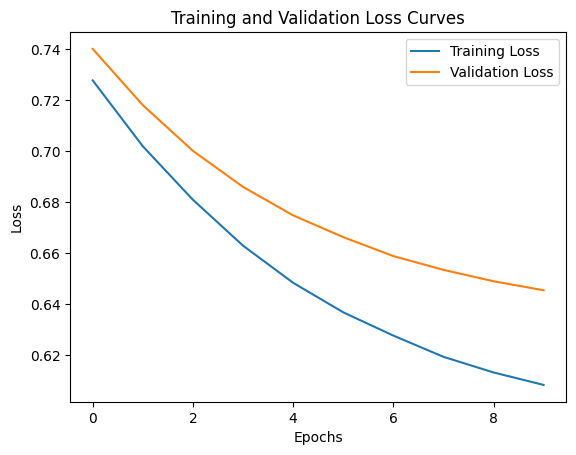

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
index = 122
probs = X_test[index].reshape(1, -1)
pred = np.argmax(probs)


In [ ]:
print(probs)

[[0.         1.         1.         0.         0.7815337  0.
  0.6960926  0.35897437 1.         2.         0.         1.
  0.         0.        ]]


In [ ]:
np.argmax(probs)

np.int64(9)

In [ ]:
model.save('my_model.keras')